## Popular Data Science Questions

Our goal in this project is to use [Data Science Stack Exchange](https://datascience.stackexchange.com) to determine what content should a data science education company create, based on interest by subject.

#### What kind of questions are welcome on this site?

On DSSE's help center's [section on questions](https://datascience.stackexchange.com/help/asking) , we can read that we should:

* Avoid subjective questions.
* Ask practical questions about Data Science — there are adequate sites for theoretical questions.
* Ask specific questions.
* Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the _Learn_ section, there are other two sites that are relevant:

* [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
* [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)

#### What, other than questions, does DSSE's [home](https://datascience.stackexchange.com) subdivide into?

On the [home page](https://datascience.stackexchange.com/) we can see that we have four sections:

* [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked;
* [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions);

    ![tags_ds](https://dq-content.s3.amazonaws.com/469/tags_ds.png)
* [Users](https://datascience.stackexchange.com/users) — a list of users;
* [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions;

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

#### What information is available in each post?

Looking, just as an example, at [this](https://datascience.stackexchange.com/questions/19141/linear-model-to-generate-probability-of-each-possible-output?rq=1) question, some of the information we see is:

* For both questions and answers:
    * The posts's score;
    * The posts's title;
    * The posts's author;
    * The posts's body;
* For questions only:
    * How many users have it on their "
    * The last time the question as active;
    * How many times the question was viewed;
    * Related questions;
    * The question's tags;


## Stack Exchange Data Explorer

Perusing the table names, a few stand out as relevant for our goal:

* Posts
* PostTags
* Tags
* TagSynonyms

Running a few exploratory queries, leads us to focus our efforts on `Posts` table. For examples, the `Tags` table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.


<table>
  <tr>
    <th>Id</th>
    <th>TagName</th>
    <th>Count</th>
    <th>ExcerptPostId</th>
    <th>WikiPostId</th>
  </tr>
  <tr>
    <td>2</td>
    <td>machine-learning</td>
    <td>6919</td>
    <td>4909</td>
    <td>4908</td>
  </tr>
  <tr>
    <td>46</td>
    <td>python</td>
    <td>3907</td>
    <td>5523</td>
    <td>5522</td>
  </tr>
  <tr>
    <td>81</td>
    <td>neural-network</td>
    <td>2923</td>
    <td>8885</td>
    <td>8884</td>
  </tr>
  <tr>
    <td>194</td>
    <td>deep-learning</td>
    <td>2786</td>
    <td>8956</td>
    <td>8955</td>
  </tr>
  <tr>
    <td>77</td>
    <td>classification</td>
    <td>1899</td>
    <td>4911</td>
    <td>4910</td>
  </tr>
  <tr>
    <td>324</td>
    <td>keras</td>
    <td>1736</td>
    <td>9251</td>
    <td>9250</td>
  </tr>
  <tr>
    <td>128</td>
    <td>scikit-learn</td>
    <td>1303</td>
    <td>5896</td>
    <td>5895</td>
  </tr>
  <tr>
    <td>321</td>
    <td>tensorflow</td>
    <td>1224</td>
    <td>9183</td>
    <td>9182</td>
  </tr>
  <tr>
    <td>47</td>
    <td>nlp</td>
    <td>1162</td>
    <td>147</td>
    <td>146</td>
  </tr>
  <tr>
    <td>24</td>
    <td>r</td>
    <td>1114</td>
    <td>49</td>
    <td>48</td>
  </tr>
</table>

## Getting the Data

To get the relevant data we run the following query.

```
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
```

Here's what the first few rows look like:

<table>
  <tr>
    <th>Id</th>
    <th>PostTypeId</th>
    <th>CreationDate</th>
    <th>Score</th>
    <th>ViewCount</th>
    <th>Tags</th>
    <th>AnswerCount</th>
    <th>FavoriteCount</th>
  </tr>
  <tr>
    <td>44419</td>
    <td>1</td>
    <td>2019-01-23 09:21:13</td>
    <td>1</td>
    <td>21</td>
    <td>&lt;machine-learning&gt;&lt;data-mining&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44420</td>
    <td>1</td>
    <td>2019-01-23 09:34:01</td>
    <td>0</td>
    <td>25</td>
    <td>&lt;machine-learning&gt;&lt;regression&gt;&lt;linear-regression&gt;&lt;regularization&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44423</td>
    <td>1</td>
    <td>2019-01-23 09:58:41</td>
    <td>2</td>
    <td>1651</td>
    <td>&lt;python&gt;&lt;time-series&gt;&lt;forecast&gt;&lt;forecasting&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44427</td>
    <td>1</td>
    <td>2019-01-23 10:57:09</td>
    <td>0</td>
    <td>55</td>
    <td>&lt;machine-learning&gt;&lt;scikit-learn&gt;&lt;pca&gt;</td>
    <td>1</td>
    <td></td>
  </tr>
  <tr>
    <td>44428</td>
    <td>1</td>
    <td>2019-01-23 11:02:15</td>
    <td>0</td>
    <td>19</td>
    <td>&lt;dataset&gt;&lt;bigdata&gt;&lt;data&gt;&lt;speech-to-text&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
</table>

# Exploring the Data


The result of the query was stored in a file called 2019_questions.csv. Here are the first few rows of the data we got:

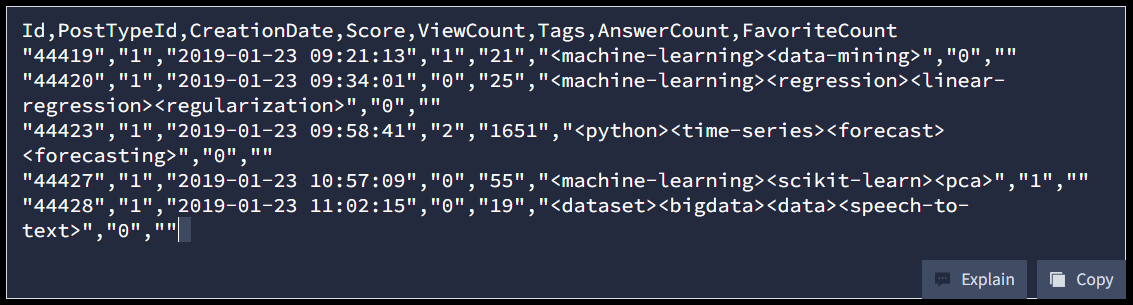

Looking at the of each row, it stands out that FavouriteCount has missing values. What other issues are there with the data? Let's explore it.

We can read in the data while immediately making sure `CreationDate` will be stored as a datetime object:

In [161]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

%matplotlib inline

questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

# Run question.info() to receive a lot of useful information
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We see that only `FavoriteCount` has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on `FavoriteCount`, there is no reason to store the values as floats.

Since the `object` dtype is a catch-all type, let's see what types the objects in `questions["Tags"]` are.

In [162]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags ([source](https://meta.stackexchange.com/a/18879)), so one way to deal with this column is to create five columns in `questions` called `Tag1`, `Tag2`, `Tag3`, `Tag4`, and `Tag5` and populate the columns with the tags in each row.

However, since doesn't help is relating tags from one question to another, we'll just keep them as a list.

# Cleaning the Data

We identified issues with the data. Fortunately for us, the folks at Stack Exchange did a great job of providing clean data. Let's fix the one issue we found, set the appropriate types for the columns, and clean the Tags column to fit our purposes.

We'll begin by fixing `FavoriteCount`.

In [163]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 449.0+ KB


Let's now modify `Tags` to make it easier to work with.
The values in the `Tags` column are strings that look like this:
-   `"<machine-learning><regression><linear-regression><regularization>"`

We'll want to transform this string in something more suitable to use typical string methods. Our goal will be to transform strings like the above in something like:

-   `"machine-learning,regression,linear-regression,regularization"`

We can then split on , to obtain a list.


In [164]:
questions["Tags"] = questions["Tags"].str.strip("<>").str.split("><")
questions.sample(3)

"""
questions["Tags"] = questions["Tags"].str.strip("<>").str.split("><")
questions.sample(3)
"""

'\nquestions["Tags"] = questions["Tags"].str.strip("<>").str.split("><")\nquestions.sample(3)\n'

# Most Used and Most Viewed

### Most Used
We'll begin by counting how many times each tag was used

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

In [165]:
tag_used_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_used_count:
            tag_used_count[tag] += 1
        else:
            tag_used_count[tag] = 1
            
tag_used_count

{'machine-learning': 2693,
 'data-mining': 217,
 'regression': 347,
 'linear-regression': 175,
 'regularization': 50,
 'python': 1814,
 'time-series': 466,
 'forecast': 34,
 'forecasting': 85,
 'scikit-learn': 540,
 'pca': 85,
 'dataset': 340,
 'bigdata': 95,
 'data': 213,
 'speech-to-text': 8,
 'fuzzy-logic': 13,
 'anomaly-detection': 92,
 'online-learning': 13,
 'matrix-factorisation': 24,
 'correlation': 80,
 'naive-bayes-classifier': 42,
 'deep-learning': 1220,
 'keras': 935,
 'cnn': 489,
 'theory': 11,
 'gradient-descent': 98,
 'nlp': 493,
 'clustering': 257,
 'feature-extraction': 87,
 'encoding': 54,
 'embeddings': 44,
 'pandas': 354,
 'numpy': 117,
 'decision-trees': 145,
 'accuracy': 89,
 'matlab': 62,
 'reinforcement-learning': 203,
 'q-learning': 37,
 'policy-gradients': 27,
 'neural-network': 1055,
 'image-classification': 211,
 'r': 268,
 'logistic-regression': 154,
 'predictive-modeling': 265,
 'lstm': 402,
 'tensorflow': 584,
 'gpu': 42,
 'data-cleaning': 157,
 'object-d

For improved aesthetics, let's transform `tag_count` in a dataframe.

In [166]:
tag_used_count = pd.DataFrame.from_dict(tag_used_count, orient="index")
tag_used_count.rename(columns={0: "Count"}, inplace=True)
tag_used_count.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


Let's now sort this dataframe by `Count` and visualize the top 20 results.

In [167]:
most_used = tag_used_count.sort_values(by="Count").tail(20)
most_used.dtypes

Count    int64
dtype: object

The threshold of `20` is somewhat arbitrary and we can experiment with others, however, popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data.

<Axes: >

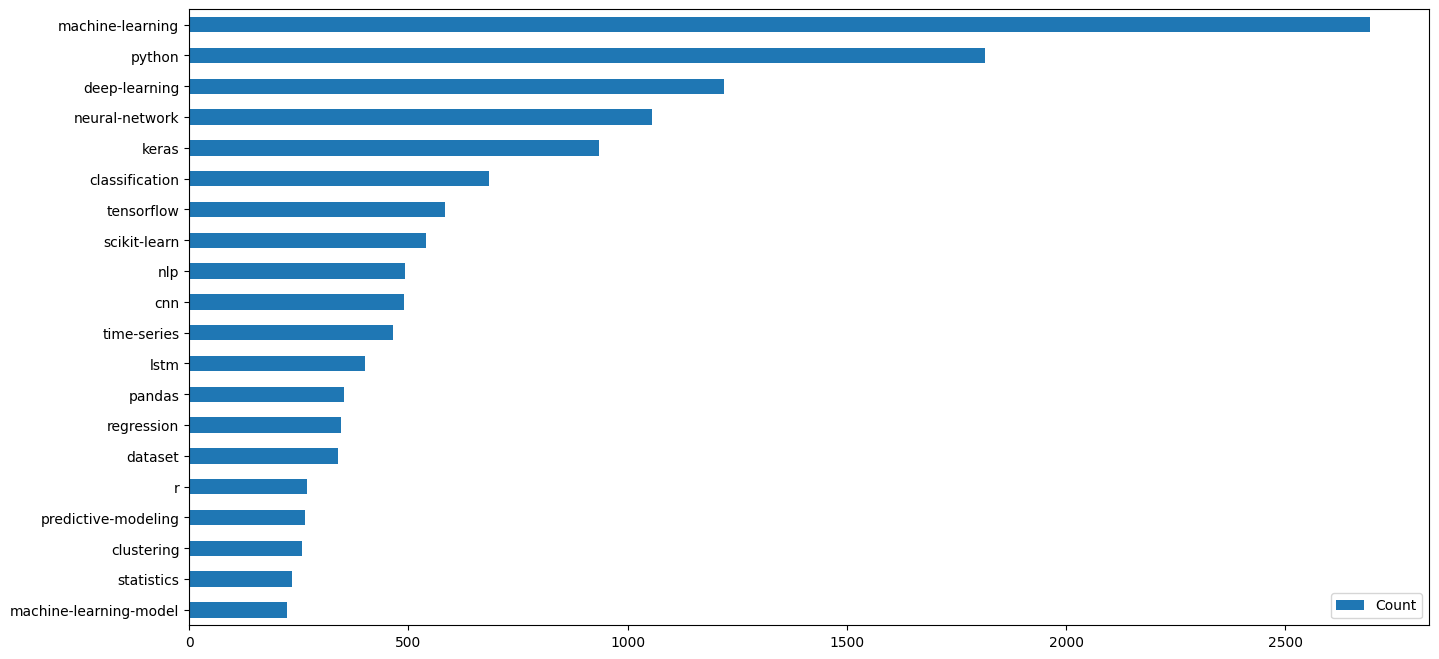

In [168]:
most_used.plot(kind="barh", figsize=(16,8))

Let 's create the word visualization for the most used

First we create a dictionary of word frequencies from the DataFrame


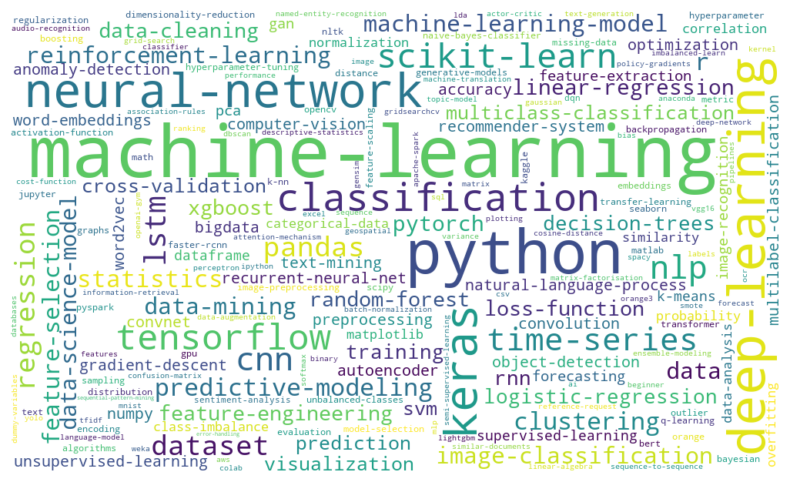

In [169]:
# Create a dictionary of word frequencies from the DataFrame
word_frequencies_used = tag_used_count.to_dict()["Count"]

# Create a word cloud object
wordcloud_used = WordCloud(width=1000, height=600, background_color='White').generate_from_frequencies(word_frequencies_used)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_used, interpolation='bilinear') # interpolation='bilinear' is an optional parameter used in the imshow() function of matplotlib.pyplot to specify the interpolation method for displaying the word cloud.
plt.axis("off")
plt.show()

### Most viewed

Some tags are very, very broad and are unlikely to be useful; e.g.: `python`, `dataset`, `r`. Before we investigate the tags a little deeper, let's repeat the same process for views.

We'll use _pandas_'s [`pandas.DataFrame.iterrows()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas.DataFrame.iterrows). 

In [170]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count

{'machine-learning': 388499,
 'data-mining': 31056,
 'regression': 49451,
 'linear-regression': 18978,
 'regularization': 4941,
 'python': 537585,
 'time-series': 64134,
 'forecast': 8153,
 'forecasting': 8797,
 'scikit-learn': 128110,
 'pca': 6387,
 'dataset': 43151,
 'bigdata': 12918,
 'data': 17888,
 'speech-to-text': 281,
 'fuzzy-logic': 1264,
 'anomaly-detection': 10992,
 'online-learning': 1485,
 'matrix-factorisation': 906,
 'correlation': 9403,
 'naive-bayes-classifier': 5734,
 'deep-learning': 233628,
 'keras': 268608,
 'cnn': 70349,
 'theory': 375,
 'gradient-descent': 14837,
 'nlp': 71382,
 'clustering': 33928,
 'feature-extraction': 12795,
 'encoding': 18843,
 'embeddings': 4055,
 'pandas': 201787,
 'numpy': 49767,
 'decision-trees': 20613,
 'accuracy': 15233,
 'matlab': 6603,
 'reinforcement-learning': 20101,
 'q-learning': 3315,
 'policy-gradients': 1429,
 'neural-network': 185367,
 'image-classification': 33238,
 'r': 33684,
 'logistic-regression': 18370,
 'predictive-mo

In [171]:
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)
tag_view_count.head(10)

,ViewCount
machine-learning,388499
data-mining,31056
regression,49451
linear-regression,18978
regularization,4941
python,537585
time-series,64134
forecast,8153
forecasting,8797
scikit-learn,128110


In [172]:
most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)
most_viewed


,ViewCount
clustering,33928
csv,38654
pytorch,40240
dataset,43151
regression,49451
numpy,49767
time-series,64134
cnn,70349
nlp,71382
lstm,74458


<Axes: >

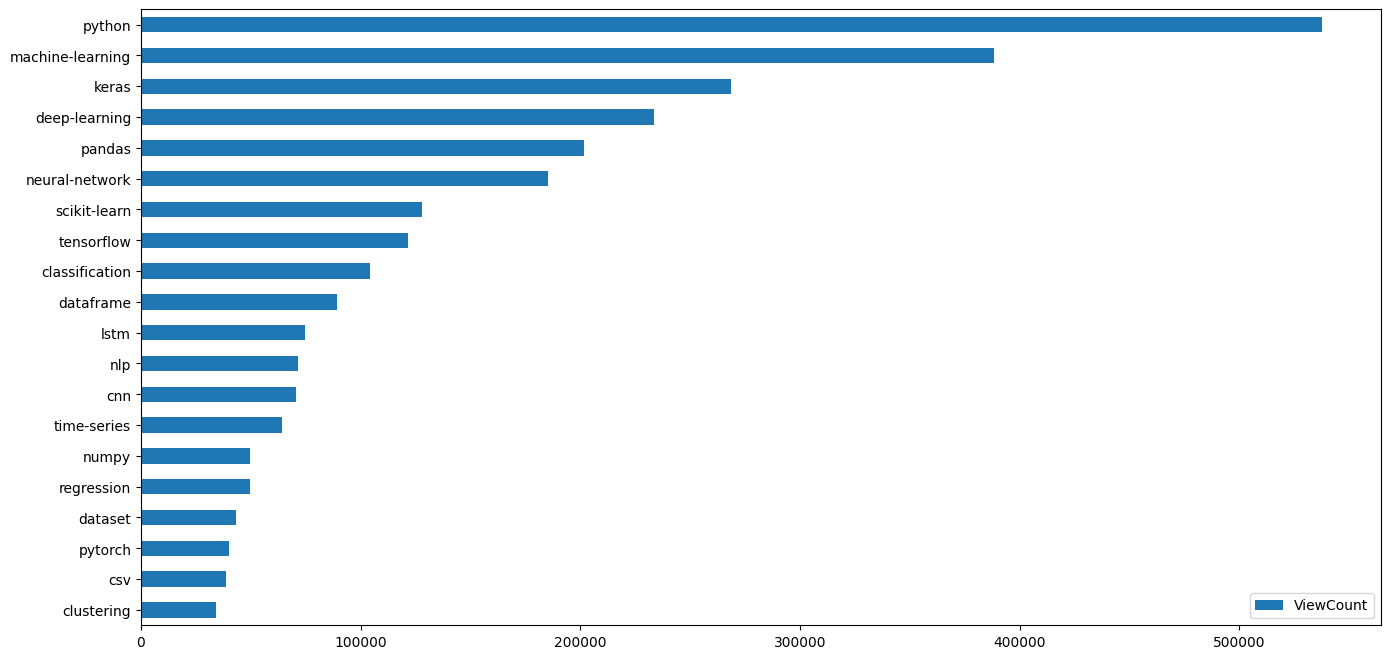

In [173]:
most_viewed.plot(kind="barh", figsize=(16, 8))

Let 's create the word visualization for the most viewed

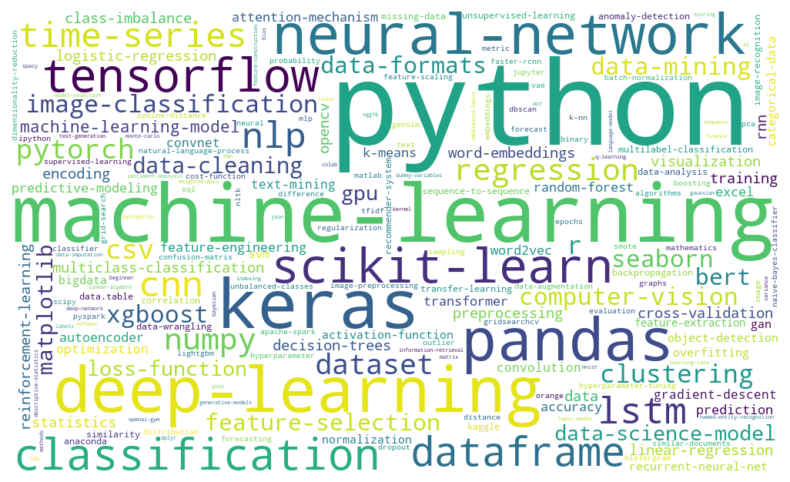

In [174]:
# Create a dictionary of word frequencies from the DataFrame
word_frequencies_viewed = tag_view_count.to_dict()["ViewCount"]

# Create a word cloud object
wordcloud_viewed = WordCloud(width=1000, height=600, background_color='White').generate_from_frequencies(word_frequencies_viewed)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_viewed, interpolation='bilinear') # interpolation='bilinear' is an optional parameter used in the imshow() function of matplotlib.pyplot to specify the interpolation method for displaying the word cloud.
plt.axis("off")
plt.show()

Let's see them side by side.

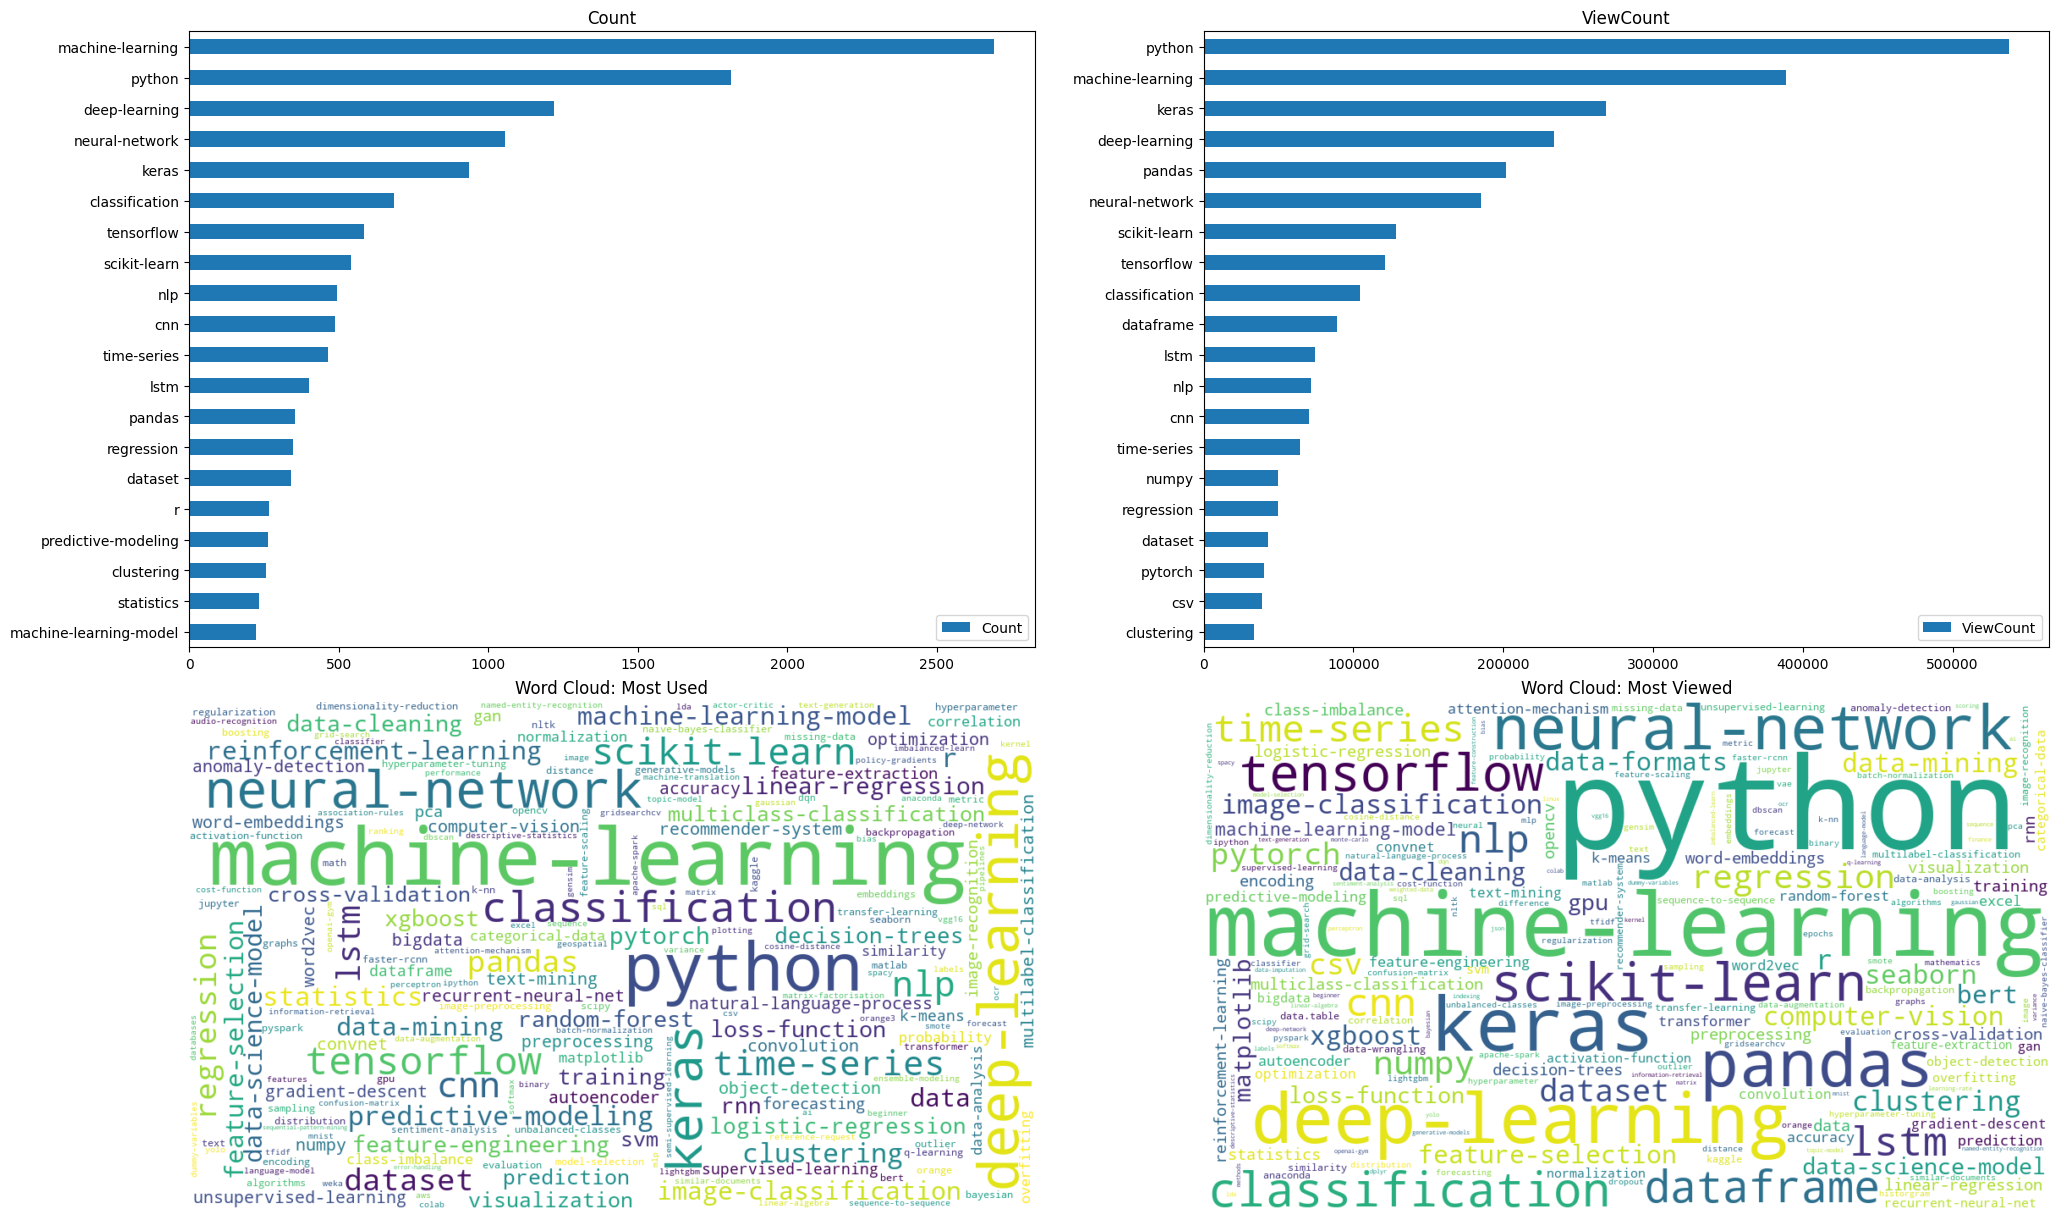

In [175]:
# Barplot
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches((24, 16))
most_used.plot(kind="barh", ax=axes[0, 0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[0, 1], subplots=True)

# Add word cloud subplots
axes[1, 0].imshow(wordcloud_used, interpolation='bilinear')
axes[1, 0].axis('off')
axes[1, 1].imshow(wordcloud_viewed, interpolation='bilinear')
axes[1, 1].axis('off')

# Set titles for word cloud subplots
axes[1, 0].set_title('Word Cloud: Most Used')
axes[1, 1].set_title('Word Cloud: Most Viewed')

# Adjust subplot spacing
plt.subplots_adjust(hspace=0)

# Display the plot
plt.show()

### Compare between most_viewed and most_used

In [176]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

in_used.sort_values(["ViewCount", "Count"], ascending=True) 

,Count,ViewCount
clustering,257,33928.0
dataset,340,43151.0
regression,347,49451.0
time-series,466,64134.0
cnn,489,70349.0
nlp,493,71382.0
lstm,402,74458.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0


# Relations Between Tags

On this screen

-   `most_used` is a dataframe that counts how many times each of the top 20 tags was used.
-   `most_viewed` is a dataframe that counts how many times each of the top 20 tags was viewed.

Looking at the results from the last exercise, we see that most top tags are present in both dataframes.

Let's see what tags are in `most_used`, but not in `most_viewed`. We can identify them by the missing values in `ViewCount`

Similarly, let's see what tags are in the latter, but not the former

The tags present in `most_used` and not present in `most_viewed` are:

-   `machine-learning-model`
-   `statistics`
-   `predictive-modeling`
-   `r`
And the tags present in `most_viewed` but not in `most_used` are:

-   `csv`
-   `pytorch`
-   `dataframe`
-   `numpy`

Some tags also stand out as being related. For example, `python` is related to `pandas`, as we can find both pythons and pandas in the same country — or better yet, because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

Other pairs of tags, shouldn't be related at all, like `pandas` and `r`:

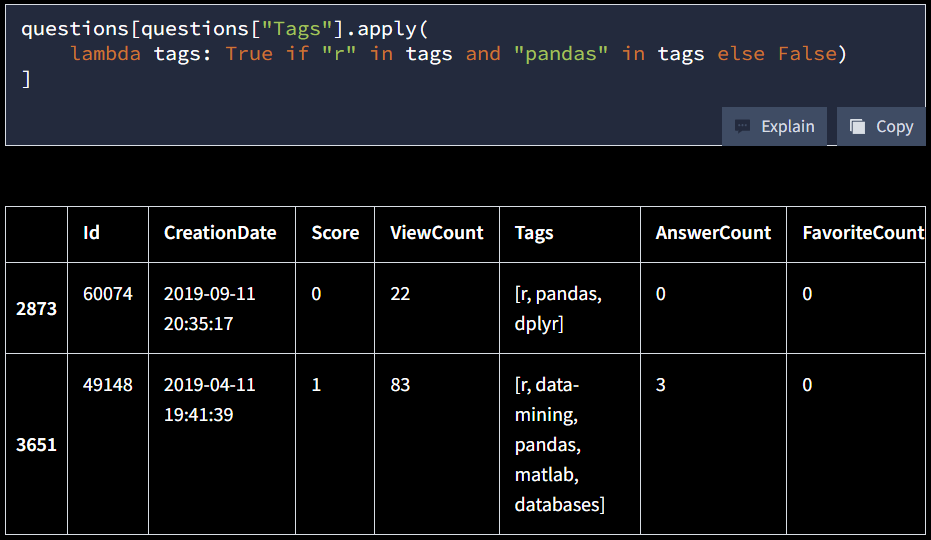

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

We'll begin by creating a list of all tags.

In [177]:
all_tags = list(tag_used_count.index)

We'll now create a dataframe where each row will represent a tag, and each column as well. Something like this:

<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>tag1</th>
      <th>tag2</th>
      <th>tag3</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>tag1</th>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <th>tag2</th>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <th>tag3</th>
      <td></td>
      <td></td>
      <td></td>
    </tr>
  </tbody>
</table>

In [178]:
associations = pd.DataFrame(index=all_tags, columns= all_tags)
associations.iloc[0:4,0:4]

,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in `questions["Tags"]`, we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [179]:
associations.fillna(0, inplace=True)
for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

This dataframe is quite large. Let's focus our attention on the most used tags. We'll add some colors to make it easier to talk about the dataframe. (At the time of this writing, GitHub's renderer does not display the colors, we suggest you use this solution notebook together with [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/)).

In [180]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(temp):
    style_df = pd.DataFrame('', index= temp.index, columns= temp.columns)
    style_df.loc['time-series', 'r'] = "background-color: black"
    style_df.loc['r', 'time-series'] = "background-color: black"
    for i in range(style_df.shape[0]):
        style_df.iloc[i, i] = "color: yellow"

    return style_df

relations_most_used.style.apply(style_cells, axis = None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


The cells highlighted in yellow tell us that `time-series` was used together with `r` 22 times. The values in yellow tell us how many times each of the tags was used. We saw earlier that `machine-learning` was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in yellow, otherwise the colors will be too skewed.

In [181]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN
    
relations_most_used.style.apply(style_cells, axis = None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,nan,3.000000,3.000000,21.000000,7.000000,12.000000,8.000000,4.000000,5.000000,7.000000,4.000000,4.000000,18.000000,9.000000,21.000000,17.000000,10.000000,19.000000,37.000000,139.000000
statistics,3.000000,nan,3.000000,16.000000,16.000000,17.000000,16.000000,3.000000,1.000000,22.000000,1.000000,3.000000,6.000000,0.000000,19.000000,3.000000,11.000000,12.000000,35.000000,89.000000
clustering,3.000000,3.000000,nan,0.000000,16.000000,5.000000,2.000000,5.000000,3.000000,20.000000,0.000000,9.000000,24.000000,0.000000,12.000000,0.000000,8.000000,2.000000,45.000000,61.000000
predictive-modeling,21.000000,16.000000,0.000000,nan,13.000000,7.000000,28.000000,4.000000,13.000000,31.000000,6.000000,1.000000,12.000000,6.000000,27.000000,11.000000,13.000000,32.000000,35.000000,123.000000
r,7.000000,16.000000,16.000000,13.000000,nan,6.000000,10.000000,2.000000,3.000000,22.000000,2.000000,4.000000,1.000000,1.000000,10.000000,10.000000,9.000000,5.000000,24.000000,63.000000
dataset,12.000000,17.000000,5.000000,7.000000,6.000000,nan,6.000000,14.000000,7.000000,6.000000,11.000000,11.000000,9.000000,9.000000,28.000000,13.000000,20.000000,32.000000,53.000000,99.000000
regression,8.000000,16.000000,2.000000,28.000000,10.000000,6.000000,nan,6.000000,11.000000,24.000000,6.000000,2.000000,37.000000,9.000000,34.000000,31.000000,42.000000,21.000000,59.000000,119.000000
pandas,4.000000,3.000000,5.000000,4.000000,2.000000,14.000000,6.000000,nan,7.000000,19.000000,1.000000,3.000000,37.000000,3.000000,3.000000,3.000000,1.000000,1.000000,244.000000,62.000000
lstm,5.000000,1.000000,3.000000,13.000000,3.000000,7.000000,11.000000,7.000000,nan,87.000000,24.000000,19.000000,2.000000,43.000000,20.000000,133.000000,69.000000,103.000000,61.000000,71.000000
time-series,7.000000,22.000000,20.000000,31.000000,22.000000,6.000000,24.000000,19.000000,87.000000,nan,8.000000,0.000000,12.000000,9.000000,25.000000,51.000000,33.000000,44.000000,105.000000,131.000000


<Axes: >

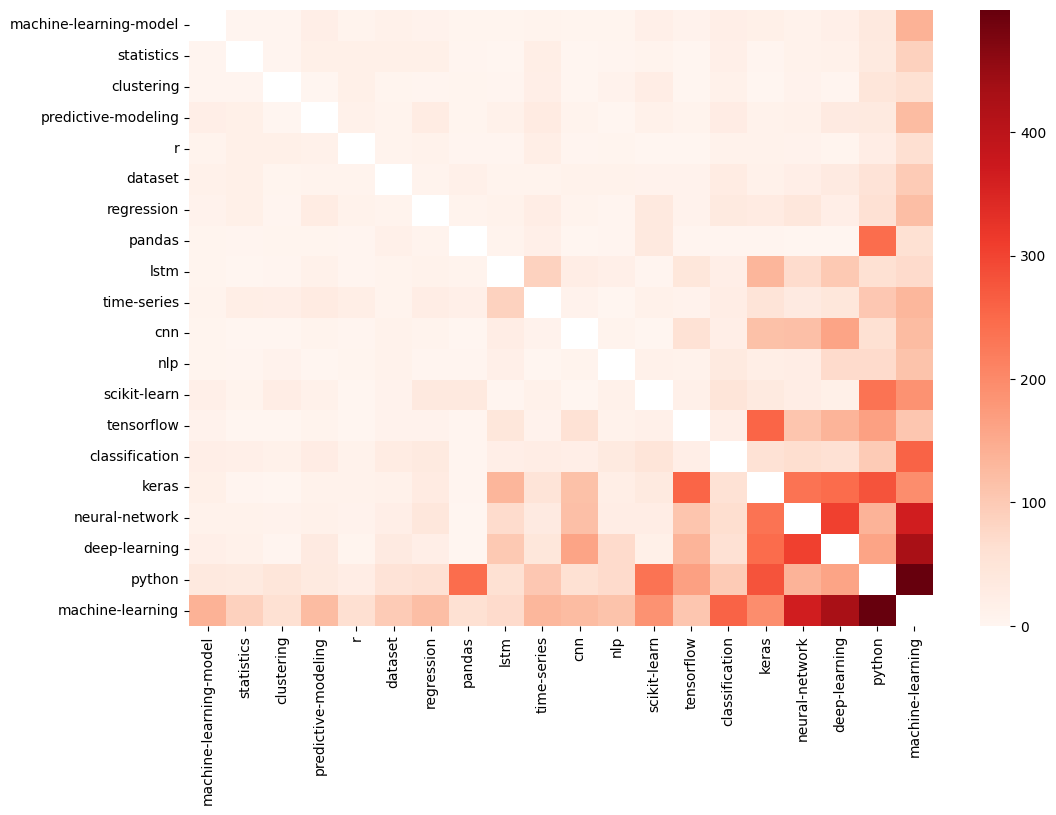

In [182]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Reds", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, `dataset` and `scikit-learn` have a "strong" relation to `pandas`, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: [association rules](https://en.wikipedia.org/wiki/Association_rule_learning). Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — you'll learn more about [statistical independence](https://en.wikipedia.org/wiki/Independence_(probability_theory)) in the next step).


We won't get into the details of it, as the technique is out of scope for this course, but it is a path worth investigating!

# Enter Domain Knowledge

[Keras](https://keras.io/), [scikit-learn](https://scikit-learn.org/), [TensorFlow](https://www.tensorflow.org/) are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

# Overview into Deep Learning

Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down? Back to SEDE!

The file all_questions.csv holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

In this we will track the interest in deep learning across time. We will:

-   Count how many deep learning questions are asked per time period.
-   The total amount of questions per time period.
-   How many deep learning questions there are relative to the total amount of questions per time period.

Let 's read the file all_questions.csv into a dataframe and then transform the tags column in a similar manner to what was previously done

In [183]:
all_questions = pd.read_csv("all_questions.csv", parse_dates= ["CreationDate"])

all_questions["Tags"] = all_questions["Tags"].str.strip("<>").str.split("><")
all_questions.sample(3)

,Id,CreationDate,Tags
2250,46425,2019-02-28 21:15:27,"[pandas, jupyter, matplotlib]"
20388,65757,2020-01-02 20:09:21,"[search, definitions, regex, ngrams]"
6717,40166,2018-10-24 16:09:23,"[classification, dataset, anomaly-detection, u..."


Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list `["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`.

This list was obtained by looking at all the tags in `most_used` and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns `1` to deep learning questions and `0` otherwise; and we use it.

In [184]:
def deep_learning_class(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

all_questions["DeepLearning"] = all_questions["Tags"].apply(deep_learning_class)
all_questions.sample(3)

,Id,CreationDate,Tags,DeepLearning
4935,39223,2018-10-05 09:11:45,"[r, statistics, outlier]",0
7840,40813,2018-11-06 11:38:56,"[python, xgboost]",0
1792,25206,2017-11-29 09:06:26,"[machine-learning, r, data-mining, logistic-re...",0


The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:


In [185]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]

Let's create a column that identifies the quarter in which a question was asked.

In [186]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month - 1) // 3) + 1)
    return ("{y}Q{q}".format(y = year, q = quarter))

all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quarter)

all_questions.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


For the final stretch of this screen, we'll group by quarter and:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers above.

In [187]:
quarterly = all_questions.groupby("Quarter").agg({"DeepLearning": ["sum", "size"]})
quarterly.columns = ["Deep_Learning_Questions","Total_Questions"]
quarterly["Deep_Learning_Rates"] = quarterly["Deep_Learning_Questions"]\
                                    / quarterly["Total_Questions"]

# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)



,Quarter,Deep_Learning_Questions,Total_Questions,Deep_Learning_Rates
0,14Q2,9,157,0.057325
12,17Q2,226,647,0.349304
20,19Q2,935,2393,0.390723
13,17Q3,247,714,0.345938
5,15Q3,45,311,0.144695


# Visualization the bar plot
Let 's build the bar plot and line plot to describe the questions asked

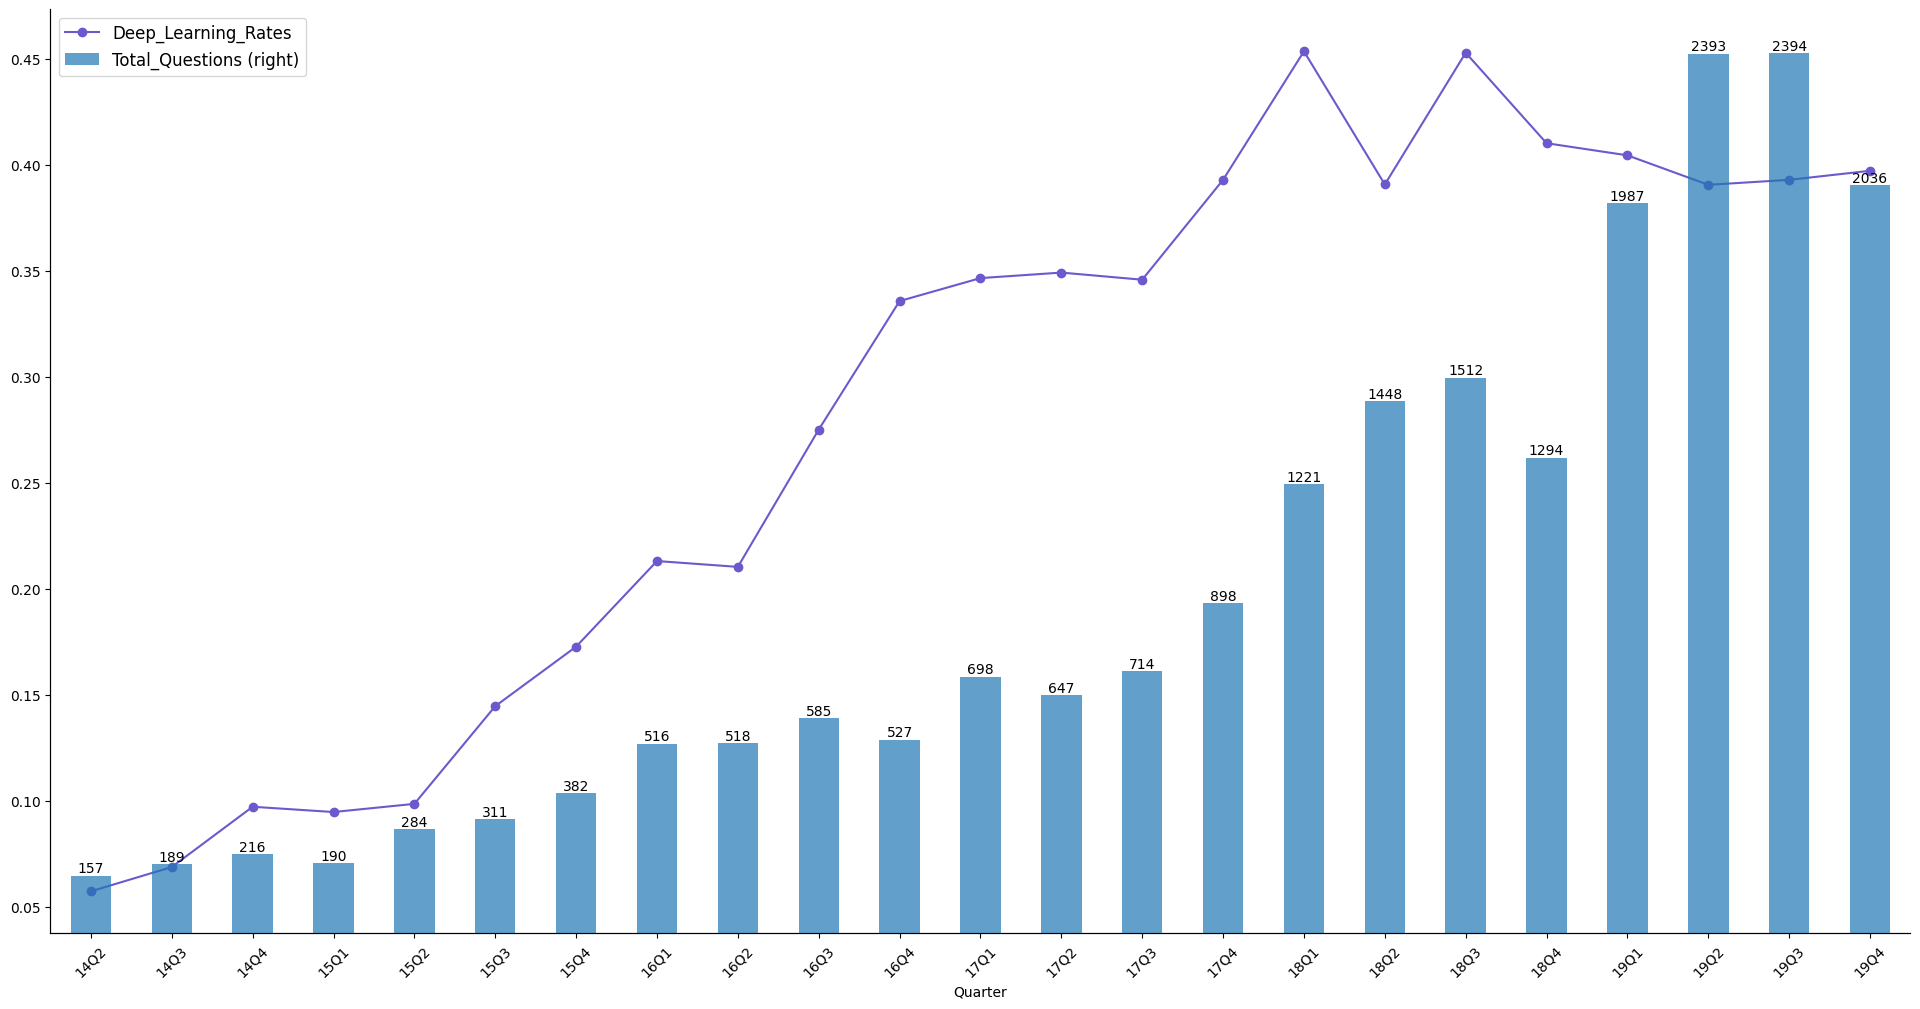

In [188]:
ax1 = quarterly.plot(x="Quarter", y="Deep_Learning_Rates", kind="line",
                     linestyle="-", marker="o", color="slateblue",
                     figsize=(24, 12))

ax2 = quarterly.plot(x="Quarter", y="Total_Questions", kind="bar",
                     ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["Total_Questions"].items():
    ax2.text(idx, t, str(t), ha="center", va="bottom")

xlims = ax1.get_xlim()
ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})

for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.

# Create the word visualizations